In [2]:
import torch
import pandas as pd
import cv2
import sklearn
import matplotlib

# --- Verification ---
print("--- Library Version Check ---")
print(f"PyTorch Version: {torch.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"OpenCV Version: {cv2.__version__}")
print(f"Scikit-learn Version: {sklearn.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")
print("-" * 30)
print("\n--- GPU / CUDA Verification ---")

# Check if CUDA (GPU support) is available for PyTorch
if torch.cuda.is_available():
    print("✅ Success! PyTorch can access your GPU.")
    
    # Get the number of GPUs
    gpu_count = torch.cuda.device_count()
    print(f"Number of GPUs available: {gpu_count}")
    
    # Get the name of the GPU
    gpu_name = torch.cuda.get_device_name(0)
    print(f"GPU Name: {gpu_name}")
    
else:
    print("❌ Error: PyTorch cannot access your GPU.")
    print("Please ensure your NVIDIA drivers are up to date and you installed the correct CUDA-enabled PyTorch package.")

print("-" * 30)

--- Library Version Check ---
PyTorch Version: 2.5.1
Pandas Version: 2.3.2
OpenCV Version: 4.12.0
Scikit-learn Version: 1.7.2
Matplotlib Version: 3.10.6
------------------------------

--- GPU / CUDA Verification ---
✅ Success! PyTorch can access your GPU.
Number of GPUs available: 1
GPU Name: NVIDIA GeForce RTX 4060 Laptop GPU
------------------------------


In [4]:
import pandas as pd
import os

# --- 1. Define File Paths ---
# Use the exact base path you provided
base_path = r"C:\Users\bened\Documents\Alyster Coding\PROJECTS\AI_GYM\bodym_data\train"

# Define paths for the three CSV files
hwg_path = os.path.join(base_path, "hwg_metadata.csv")
measurements_path = os.path.join(base_path, "measurements.csv")
map_path = os.path.join(base_path, "subject_to_photo_map.csv")

# --- 2. Load the CSV files into Pandas DataFrames ---
try:
    df_hwg = pd.read_csv(hwg_path)
    df_measurements = pd.read_csv(measurements_path)
    df_map = pd.read_csv(map_path)

    print("✅ Successfully loaded all three CSV files.")
    print(f"Loaded {len(df_hwg)} records from hwg_metadata.csv")
    print(f"Loaded {len(df_measurements)} records from measurements.csv")
    print(f"Loaded {len(df_map)} records from subject_to_photo_map.csv")

except FileNotFoundError as e:
    print(f"❌ Error: A file was not found. Please check your paths.")
    print(e)
    # Stop execution if files aren't found
    # You can comment out the line below if you want the script to continue
    raise

# --- 3. Merge the DataFrames ---
# We will merge them based on the common 'subject_id' column

# Merge hwg and measurements
df_merged = pd.merge(df_hwg, df_measurements, on="subject_id")

# Merge the result with the photo map
df_final = pd.merge(df_merged, df_map, on="subject_id")


# --- 4. Display Results ---
print("\n--- Merged DataFrame ---")
print(f"Total combined records: {len(df_final)}")
print(f"Number of columns: {len(df_final.columns)}")

print("\nFirst 5 rows of the final combined data:")
# Display the first 5 rows of the final DataFrame
display(df_final.tail())

✅ Successfully loaded all three CSV files.
Loaded 2018 records from hwg_metadata.csv
Loaded 2018 records from measurements.csv
Loaded 6134 records from subject_to_photo_map.csv

--- Merged DataFrame ---
Total combined records: 6134
Number of columns: 19

First 5 rows of the final combined data:


,subject_id,gender,height_cm,weight_kg,ankle,arm-length,bicep,calf,chest,forearm,height,hip,leg-length,shoulder-breadth,shoulder-to-crotch,thigh,waist,wrist,photo_id
6129,59bc2766681516389ccf4567,female,163.5,94.8,25.274067,46.793224,36.78611,43.383587,114.404602,29.421007,165.686691,124.820801,74.443527,34.986019,64.051949,61.815491,105.351906,17.258446,300a0603dd3b4b3c1b93a96d7fd4f8a2
6130,59bc2766681516389ccf4567,female,163.5,94.8,25.274067,46.793224,36.78611,43.383587,114.404602,29.421007,165.686691,124.820801,74.443527,34.986019,64.051949,61.815491,105.351906,17.258446,276e63016747cea4b86acbd03ec0215c
6131,59bc2766681516389ccf4567,female,163.5,94.8,25.274067,46.793224,36.78611,43.383587,114.404602,29.421007,165.686691,124.820801,74.443527,34.986019,64.051949,61.815491,105.351906,17.258446,b820f593639c674944b7db1c1b0e8e00
6132,59bc2766681516389ccf4567,female,163.5,94.8,25.274067,46.793224,36.78611,43.383587,114.404602,29.421007,165.686691,124.820801,74.443527,34.986019,64.051949,61.815491,105.351906,17.258446,4efec0342932935bede796a50359da63
6133,59bc2766681516389ccf4567,female,163.5,94.8,25.274067,46.793224,36.78611,43.383587,114.404602,29.421007,165.686691,124.820801,74.443527,34.986019,64.051949,61.815491,105.351906,17.258446,fa068a280c0a2a1ec03ceae7580d7a94


Exploratory Data Analysis

C:\Users\bened\AppData\Local\Temp\ipykernel_14124\2123244074.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df_final, palette=['#6495ED', '#FFC0CB'])


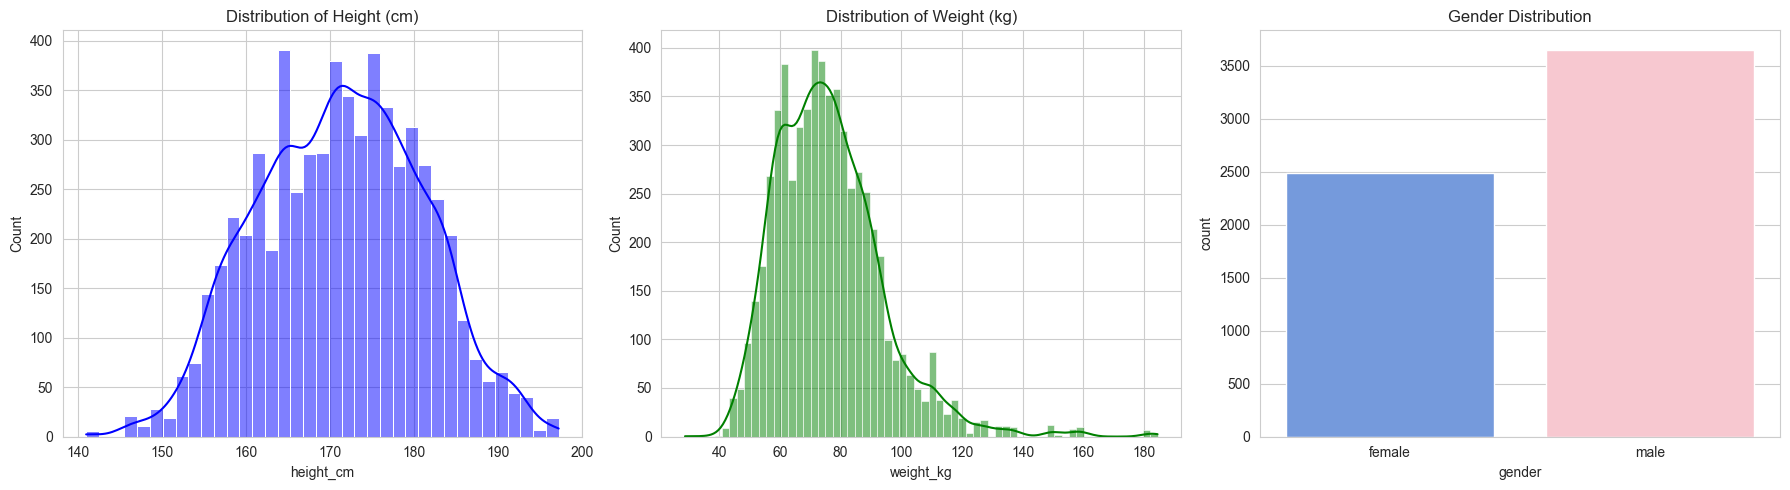

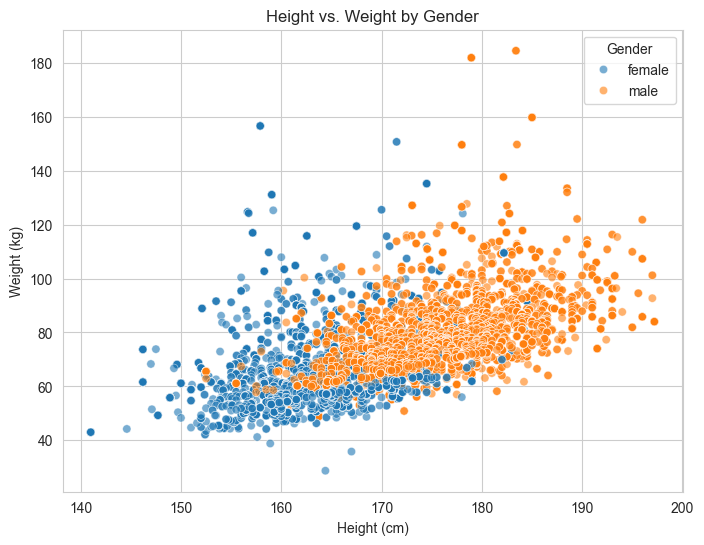

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the df_final from the previous step is in memory

# --- 1. Set up the plotting style ---
sns.set_style("whitegrid")
plt.figure(figsize=(18, 5)) # Set a larger figure size for better layout

# --- 2. Plot Distribution of Height ---
plt.subplot(1, 3, 1) # (1 row, 3 columns, 1st plot)
sns.histplot(df_final['height_cm'], kde=True, color='blue')
plt.title('Distribution of Height (cm)')

# --- 3. Plot Distribution of Weight ---
plt.subplot(1, 3, 2) # (1 row, 3 columns, 2nd plot)
sns.histplot(df_final['weight_kg'], kde=True, color='green')
plt.title('Distribution of Weight (kg)')

# --- 4. Plot Gender Distribution ---
plt.subplot(1, 3, 3) # (1 row, 3 columns, 3rd plot)
sns.countplot(x='gender', data=df_final, palette=['#6495ED', '#FFC0CB'])
plt.title('Gender Distribution')


# Display the plots
plt.tight_layout() # Adjusts plots to prevent them from overlapping
plt.show()

# --- 5. Scatter plot of Height vs. Weight ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x='height_cm', y='weight_kg', hue='gender', data=df_final, alpha=0.6)
plt.title('Height vs. Weight by Gender')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend(title='Gender')
plt.show()

linking the images to the dataframe

Displaying a random sample from index: 3606


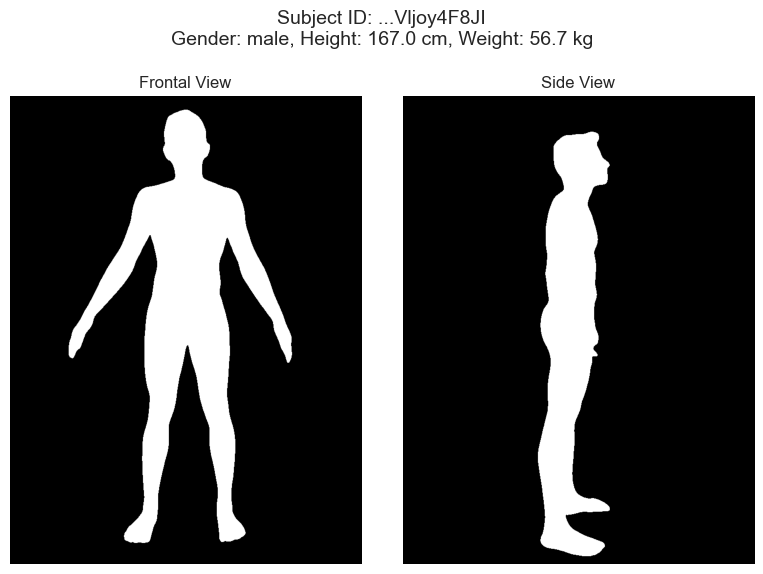

In [7]:
import cv2
import matplotlib.pyplot as plt
import os
import random

# Ensure the df_final DataFrame from the previous step is in memory

# --- 1. Construct Full Image Paths ---
# We create new columns in our DataFrame to hold the full path to each image file.
# We need to add the '.png' extension to the photo_id.

base_path = r"C:\Users\bened\Documents\Alyster Coding\PROJECTS\AI_GYM\bodym_data\train"

df_final['frontal_img_path'] = df_final['photo_id'].apply(
    lambda id: os.path.join(base_path, 'mask', id + '.png')
)

df_final['side_img_path'] = df_final['photo_id'].apply(
    lambda id: os.path.join(base_path, 'mask_left', id + '.png')
)


# --- 2. Create a Function to Display a Sample ---
def show_sample(df, index):
    """Loads and displays the frontal and side images for a given index in the DataFrame."""
    
    # Get the record (row) at the specified index
    sample_record = df.iloc[index]
    
    # Get the image paths from the DataFrame
    frontal_path = sample_record['frontal_img_path']
    side_path = sample_record['side_img_path']
    
    # Load the images using OpenCV
    # cv2.IMREAD_GRAYSCALE loads them as black and white, which is what they are.
    frontal_img = cv2.imread(frontal_path, cv2.IMREAD_GRAYSCALE)
    side_img = cv2.imread(side_path, cv2.IMREAD_GRAYSCALE)
    
    # --- Display the images and data ---
    fig, axes = plt.subplots(1, 2, figsize=(8, 6)) # 1 row, 2 columns

    # Display Frontal Image
    axes[0].imshow(frontal_img, cmap='gray')
    axes[0].set_title("Frontal View")
    axes[0].axis('off') # Hide axes ticks

    # Display Side Image
    axes[1].imshow(side_img, cmap='gray')
    axes[1].set_title("Side View")
    axes[1].axis('off')

    # Create a title for the entire figure with the sample's data
    title = (f"Subject ID: ...{sample_record['subject_id'][-10:]}\n"
             f"Gender: {sample_record['gender']}, Height: {sample_record['height_cm']} cm, "
             f"Weight: {sample_record['weight_kg']} kg")
    fig.suptitle(title, fontsize=14)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
    plt.show()


# --- 3. Display a Random Sample ---
# Generate a random index to view a different subject each time you run the cell
random_index = random.randint(0, len(df_final) - 1)
print(f"Displaying a random sample from index: {random_index}")
show_sample(df_final, random_index)



Creating a Custom PyTorch Dataset

In [8]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import cv2
import numpy as np

# --- 1. Define the list of target measurement columns ---
# These are the values our model will learn to predict.
TARGET_COLUMNS = [
    'height_cm', 'weight_kg', 'ankle', 'arm-length', 'bicep', 'calf', 'chest', 
    'forearm', 'hip', 'leg-length', 'shoulder-breadth', 'shoulder-to-crotch', 
    'thigh', 'waist', 'wrist'
]

# --- 2. Create the Custom Dataset Class ---
class BodyMDataset(Dataset):
    def __init__(self, df, target_columns, transform=None):
        """
        Args:
            df (pd.DataFrame): The merged DataFrame with image paths and measurements.
            target_columns (list): A list of column names for the target values.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.df = df
        self.target_columns = target_columns
        self.transform = transform

    def __len__(self):
        """Returns the total number of samples in the dataset."""
        return len(self.df)

    def __getitem__(self, idx):
        """Fetches a single sample (images and targets) from the dataset."""
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        # Get image paths and target measurements for the given index
        row = self.df.iloc[idx]
        frontal_path = row['frontal_img_path']
        side_path = row['side_img_path']
        
        # Load images
        frontal_img = cv2.imread(frontal_path, cv2.IMREAD_GRAYSCALE)
        side_img = cv2.imread(side_path, cv2.IMREAD_GRAYSCALE)
        
        # Extract target values and convert to a numpy array of type float32
        targets = row[self.target_columns].values.astype(np.float32)
        
        # Apply transformations if they exist
        if self.transform:
            frontal_img = self.transform(frontal_img)
            side_img = self.transform(side_img)
            
        return frontal_img, side_img, torch.from_numpy(targets)

# --- 3. Define Image Transformations ---
# We need to resize images to a consistent size and convert them to PyTorch Tensors.
# The model will also expect 3 color channels, so we convert grayscale to RGB.
# Normalization helps the model train better.
image_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3), # Convert grayscale to 3-channel
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) # Normalize to [-1, 1]
])

# --- 4. Instantiate the Dataset and DataLoader ---
# Create an instance of our custom dataset
train_dataset = BodyMDataset(df=df_final, 
                             target_columns=TARGET_COLUMNS, 
                             transform=image_transforms)

# Create the DataLoader
# This will create batches of data to feed to the model.
# A batch size of 32 is a common starting point.
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)


# --- 5. Verify the DataLoader ---
# Let's grab one batch of data to check if everything is working.
try:
    frontal_batch, side_batch, targets_batch = next(iter(train_dataloader))

    print("✅ Successfully created Dataset and DataLoader!")
    print("\n--- Batch Shape Verification ---")
    print(f"Frontal images batch shape: {frontal_batch.shape}")
    print(f"Side images batch shape:    {side_batch.shape}")
    print(f"Targets batch shape:        {targets_batch.shape}")
except Exception as e:
    print(f"❌ An error occurred while creating the DataLoader: {e}")

✅ Successfully created Dataset and DataLoader!

--- Batch Shape Verification ---
Frontal images batch shape: torch.Size([32, 3, 224, 224])
Side images batch shape:    torch.Size([32, 3, 224, 224])
Targets batch shape:        torch.Size([32, 15])


A Dual-Branch EfficientNet

In [9]:
import torch
import torch.nn as nn
from torchvision import models

# --- 1. Define the Multi-Branch Model Architecture ---

class BodyM_MetricEstimator(nn.Module):
    def __init__(self, num_measurements):
        """
        Args:
            num_measurements (int): The number of output values to predict (e.g., 15).
        """
        super(BodyM_MetricEstimator, self).__init__()
        
        # --- Branch 1: Frontal View ---
        # Load a pre-trained EfficientNet-B4. 'B4' is a great balance of size and power.
        self.frontal_branch = models.efficientnet_b4(weights=models.EfficientNet_B4_Weights.DEFAULT)
        
        # --- Branch 2: Side View ---
        # Load a second instance of the same pre-trained model
        self.side_branch = models.efficientnet_b4(weights=models.EfficientNet_B4_Weights.DEFAULT)
        
        # --- Modifying the Models ---
        # The original EfficientNet-B4 has a final layer (classifier) with 1000 outputs.
        # We need to replace this with our own custom "head" for regression.
        # Let's get the number of input features to that final layer.
        num_features = self.frontal_branch.classifier[1].in_features # e.g., 1792 for B4
        
        # We replace the classifier of both branches with an Identity layer.
        # This means the branches will output the raw feature vectors before the final classification.
        self.frontal_branch.classifier = nn.Identity()
        self.side_branch.classifier = nn.Identity()
        
        # --- Regression Head ---
        # This head takes the combined feature vectors from both branches and outputs the measurements.
        # The input size is num_features * 2 because we concatenate the features from two branches.
        self.regression_head = nn.Sequential(
            nn.Linear(num_features * 2, 1024),
            nn.ReLU(),
            nn.Dropout(0.5), # Dropout is a regularization technique to prevent overfitting
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_measurements) # The final output layer
        )

    def forward(self, frontal_img, side_img):
        """Defines the forward pass of the model."""
        # Get feature vectors from each branch
        frontal_features = self.frontal_branch(frontal_img)
        side_features = self.side_branch(side_img)
        
        # Concatenate the feature vectors along the channel dimension
        combined_features = torch.cat((frontal_features, side_features), dim=1)
        
        # Pass the combined features through the regression head to get the final predictions
        predictions = self.regression_head(combined_features)
        
        return predictions

# --- 2. Instantiate and Verify the Model ---

# Define the number of target measurements from our previous step
NUM_TARGETS = 15

# Create an instance of the model
model = BodyM_MetricEstimator(num_measurements=NUM_TARGETS)

# Determine the device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(f"✅ Model successfully created and moved to '{device}'.")
print("\n--- Model Architecture ---")
# You can uncomment the line below to see the full architecture, but it's very long!
# print(model)

# --- 3. Test with a Dummy Batch ---
# Let's create a fake batch of data with the same shape as our DataLoader output
# and pass it through the model to verify the output shape is correct.
dummy_frontal_batch = torch.randn(32, 3, 224, 224).to(device)
dummy_side_batch = torch.randn(32, 3, 224, 224).to(device)

# Get model output
with torch.no_grad(): # We don't need to calculate gradients for this test
    output = model(dummy_frontal_batch, dummy_side_batch)

print("\n--- Shape Verification ---")
print(f"Input batch shape (frontal): {dummy_frontal_batch.shape}")
print(f"Input batch shape (side):    {dummy_side_batch.shape}")
print(f"Output predictions shape:    {output.shape}")

# The output shape should be [32, 15] -> (batch_size, num_measurements)
if output.shape == (32, NUM_TARGETS):
    print("\n✅ Success! The model's output shape is correct.")
else:
    print("\n❌ Error: The model's output shape is incorrect.")

Downloading: "https://download.pytorch.org/models/efficientnet_b4_rwightman-23ab8bcd.pth" to C:\Users\bened/.cache\torch\hub\checkpoints\efficientnet_b4_rwightman-23ab8bcd.pth
100.0%


✅ Model successfully created and moved to 'cuda'.

--- Model Architecture ---

--- Shape Verification ---
Input batch shape (frontal): torch.Size([32, 3, 224, 224])
Input batch shape (side):    torch.Size([32, 3, 224, 224])
Output predictions shape:    torch.Size([32, 15])

✅ Success! The model's output shape is correct.


Split the Data into Training and Validation Sets

In [10]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into training (85%) and validation (15%) sets
train_df, val_df = train_test_split(df_final, test_size=0.15, random_state=42)

print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")

Training samples: 5213
Validation samples: 921


 Create Datasets and DataLoaders for Both Sets

In [11]:
# Create the training dataset and dataloader
train_dataset = BodyMDataset(df=train_df, 
                             target_columns=TARGET_COLUMNS, 
                             transform=image_transforms)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Create the validation dataset and dataloader
val_dataset = BodyMDataset(df=val_df, 
                           target_columns=TARGET_COLUMNS, 
                           transform=image_transforms)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False) # No need to shuffle validation data

Define the Core Training Components

In [12]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

# --- Re-instantiate the model to ensure we start fresh ---
model = BodyM_MetricEstimator(num_measurements=NUM_TARGETS)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 1. LOSS FUNCTION (Robust for accuracy)
criterion = nn.SmoothL1Loss()

# 2. OPTIMIZER (State-of-the-art)
optimizer = optim.AdamW(model.parameters(), lr=0.001) # A good starting learning rate

# 3. LEARNING RATE SCHEDULER (For fine-tuning accuracy)
scheduler = ReduceLROnPlateau(optimizer, 
                              mode='min',      # It will monitor the minimum value of the loss
                              factor=0.1,      # Reduce LR by a factor of 10
                              patience=3,      # Wait for 3 epochs of no improvement before reducing
                              verbose=True)    # Print a message when the LR is reduced

print("✅ Training components are defined and ready.")

✅ Training components are defined and ready.


c:\Users\bened\anaconda3\envs\metrics\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


The Training Loop

In [13]:
import torch
from tqdm import tqdm
import numpy as np
import time

# --- 1. Training Configuration ---
NUM_EPOCHS = 25  # A good starting point for transfer learning
BEST_MODEL_PATH = "best_bodym_model.pth" # Path to save the best model weights
best_val_loss = float('inf') # Initialize with a very high value

# --- 2. History Tracking ---
# We will store the loss and error from each epoch to plot them later
history = {
    'train_loss': [],
    'val_loss': [],
    'train_mae': [],
    'val_mae': []
}

# --- 3. The Main Training Loop ---
print("🚀 Starting model training...")
start_time = time.time()

for epoch in range(NUM_EPOCHS):
    
    # --- Training Phase ---
    model.train() # Set the model to training mode
    
    running_train_loss = 0.0
    running_train_mae = 0.0
    
    # Use tqdm for a progress bar
    train_progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Training]")
    
    for frontal_imgs, side_imgs, targets in train_progress_bar:
        # Move data to the GPU
        frontal_imgs = frontal_imgs.to(device)
        side_imgs = side_imgs.to(device)
        targets = targets.to(device)
        
        # --- Forward pass ---
        predictions = model(frontal_imgs, side_imgs)
        loss = criterion(predictions, targets)
        
        # --- Backward pass and optimization ---
        optimizer.zero_grad() # Clear previous gradients
        loss.backward()       # Compute gradients
        optimizer.step()      # Update model weights
        
        # --- Statistics ---
        running_train_loss += loss.item() * frontal_imgs.size(0)
        # Calculate Mean Absolute Error (MAE)
        mae = torch.mean(torch.abs(predictions - targets))
        running_train_mae += mae.item() * frontal_imgs.size(0)

    # --- Validation Phase ---
    model.eval() # Set the model to evaluation mode
    
    running_val_loss = 0.0
    running_val_mae = 0.0
    
    val_progress_bar = tqdm(val_dataloader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Validation]")

    with torch.no_grad(): # We don't need to compute gradients during validation
        for frontal_imgs, side_imgs, targets in val_progress_bar:
            frontal_imgs = frontal_imgs.to(device)
            side_imgs = side_imgs.to(device)
            targets = targets.to(device)
            
            predictions = model(frontal_imgs, side_imgs)
            loss = criterion(predictions, targets)
            
            running_val_loss += loss.item() * frontal_imgs.size(0)
            mae = torch.mean(torch.abs(predictions - targets))
            running_val_mae += mae.item() * frontal_imgs.size(0)
            
    # --- Epoch Statistics and Checkpointing ---
    epoch_train_loss = running_train_loss / len(train_dataset)
    epoch_train_mae = running_train_mae / len(train_dataset)
    
    epoch_val_loss = running_val_loss / len(val_dataset)
    epoch_val_mae = running_val_mae / len(val_dataset)
    
    # Update history
    history['train_loss'].append(epoch_train_loss)
    history['train_mae'].append(epoch_train_mae)
    history['val_loss'].append(epoch_val_loss)
    history['val_mae'].append(epoch_val_mae)
    
    print(f"\nEpoch {epoch+1}/{NUM_EPOCHS} -> "
          f"Train Loss: {epoch_train_loss:.4f}, Train MAE: {epoch_train_mae:.4f} | "
          f"Val Loss: {epoch_val_loss:.4f}, Val MAE: {epoch_val_mae:.4f}\n")
    
    # Learning rate scheduler step
    scheduler.step(epoch_val_loss)
    
    # Save the model if validation loss has improved
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        torch.save(model.state_dict(), BEST_MODEL_PATH)
        print(f"🎉 New best model saved! Validation Loss improved to {best_val_loss:.4f}\n")

# --- End of Training ---
total_time = time.time() - start_time
print("🏁 Training complete!")
print(f"Total training time: {total_time // 60:.0f}m {total_time % 60:.0f}s")
print(f"Best validation loss achieved: {best_val_loss:.4f}")
print(f"The best model weights are saved at: {BEST_MODEL_PATH}")

🚀 Starting model training...


Epoch 1/25 [Validation]: 100%|██████████| 29/29 [01:44<00:00,  3.62s/it]



Epoch 1/25 -> Train Loss: 11.9010, Train MAE: 12.3883 | Val Loss: 4.1037, Val MAE: 4.5653

🎉 New best model saved! Validation Loss improved to 4.1037



Epoch 2/25 [Validation]: 100%|██████████| 29/29 [02:05<00:00,  4.33s/it]



Epoch 2/25 -> Train Loss: 7.0400, Train MAE: 7.5200 | Val Loss: 4.0496, Val MAE: 4.5131

🎉 New best model saved! Validation Loss improved to 4.0496



Epoch 3/25 [Validation]: 100%|██████████| 29/29 [01:09<00:00,  2.38s/it]



Epoch 3/25 -> Train Loss: 6.5791, Train MAE: 7.0572 | Val Loss: 4.3765, Val MAE: 4.8396



Epoch 4/25 [Validation]: 100%|██████████| 29/29 [01:45<00:00,  3.64s/it]



Epoch 4/25 -> Train Loss: 6.4126, Train MAE: 6.8905 | Val Loss: 4.1782, Val MAE: 4.6383



Epoch 5/25 [Validation]: 100%|██████████| 29/29 [01:50<00:00,  3.81s/it]



Epoch 5/25 -> Train Loss: 6.1290, Train MAE: 6.6056 | Val Loss: 3.7008, Val MAE: 4.1569

🎉 New best model saved! Validation Loss improved to 3.7008



Epoch 6/25 [Validation]: 100%|██████████| 29/29 [01:37<00:00,  3.36s/it]



Epoch 6/25 -> Train Loss: 5.7004, Train MAE: 6.1749 | Val Loss: 3.8951, Val MAE: 4.3588



Epoch 7/25 [Validation]: 100%|██████████| 29/29 [01:33<00:00,  3.22s/it]



Epoch 7/25 -> Train Loss: 5.6549, Train MAE: 6.1296 | Val Loss: 3.0465, Val MAE: 3.4970

🎉 New best model saved! Validation Loss improved to 3.0465



Epoch 8/25 [Validation]: 100%|██████████| 29/29 [01:48<00:00,  3.74s/it]



Epoch 8/25 -> Train Loss: 5.3462, Train MAE: 5.8198 | Val Loss: 4.7557, Val MAE: 5.2297



Epoch 9/25 [Validation]: 100%|██████████| 29/29 [01:37<00:00,  3.35s/it]



Epoch 9/25 -> Train Loss: 5.1399, Train MAE: 5.6127 | Val Loss: 2.8143, Val MAE: 3.2691

🎉 New best model saved! Validation Loss improved to 2.8143



Epoch 10/25 [Validation]: 100%|██████████| 29/29 [01:27<00:00,  3.00s/it]



Epoch 10/25 -> Train Loss: 5.1523, Train MAE: 5.6252 | Val Loss: 2.8614, Val MAE: 3.3120



Epoch 11/25 [Validation]: 100%|██████████| 29/29 [01:32<00:00,  3.19s/it]



Epoch 11/25 -> Train Loss: 5.2701, Train MAE: 5.7439 | Val Loss: 2.7965, Val MAE: 3.2446

🎉 New best model saved! Validation Loss improved to 2.7965



Epoch 12/25 [Validation]: 100%|██████████| 29/29 [01:28<00:00,  3.07s/it]



Epoch 12/25 -> Train Loss: 5.0925, Train MAE: 5.5648 | Val Loss: 2.8422, Val MAE: 3.2943



Epoch 13/25 [Validation]: 100%|██████████| 29/29 [01:21<00:00,  2.81s/it]



Epoch 13/25 -> Train Loss: 5.0541, Train MAE: 5.5266 | Val Loss: 3.2233, Val MAE: 3.6807



Epoch 14/25 [Validation]: 100%|██████████| 29/29 [01:31<00:00,  3.16s/it]



Epoch 14/25 -> Train Loss: 5.1386, Train MAE: 5.6120 | Val Loss: 2.7618, Val MAE: 3.2145

🎉 New best model saved! Validation Loss improved to 2.7618



Epoch 15/25 [Validation]: 100%|██████████| 29/29 [01:21<00:00,  2.82s/it]



Epoch 15/25 -> Train Loss: 5.0484, Train MAE: 5.5205 | Val Loss: 2.9894, Val MAE: 3.4409



Epoch 16/25 [Validation]: 100%|██████████| 29/29 [01:31<00:00,  3.16s/it]



Epoch 16/25 -> Train Loss: 5.0600, Train MAE: 5.5328 | Val Loss: 2.6049, Val MAE: 3.0527

🎉 New best model saved! Validation Loss improved to 2.6049



Epoch 17/25 [Validation]: 100%|██████████| 29/29 [00:51<00:00,  1.79s/it]



Epoch 17/25 -> Train Loss: 5.0021, Train MAE: 5.4746 | Val Loss: 2.6267, Val MAE: 3.0815



Epoch 18/25 [Validation]: 100%|██████████| 29/29 [01:26<00:00,  2.97s/it]



Epoch 18/25 -> Train Loss: 4.9776, Train MAE: 5.4496 | Val Loss: 4.4272, Val MAE: 4.9093



Epoch 19/25 [Validation]: 100%|██████████| 29/29 [01:34<00:00,  3.27s/it]



Epoch 19/25 -> Train Loss: 4.9733, Train MAE: 5.4455 | Val Loss: 2.6065, Val MAE: 3.0580



Epoch 20/25 [Validation]: 100%|██████████| 29/29 [01:36<00:00,  3.31s/it]



Epoch 20/25 -> Train Loss: 5.0133, Train MAE: 5.4852 | Val Loss: 2.9475, Val MAE: 3.4146



Epoch 21/25 [Validation]: 100%|██████████| 29/29 [01:31<00:00,  3.17s/it]



Epoch 21/25 -> Train Loss: 4.6949, Train MAE: 5.1656 | Val Loss: 2.3576, Val MAE: 2.8032

🎉 New best model saved! Validation Loss improved to 2.3576



Epoch 22/25 [Validation]: 100%|██████████| 29/29 [01:34<00:00,  3.26s/it]



Epoch 22/25 -> Train Loss: 4.6324, Train MAE: 5.1022 | Val Loss: 2.3035, Val MAE: 2.7471

🎉 New best model saved! Validation Loss improved to 2.3035



Epoch 23/25 [Validation]: 100%|██████████| 29/29 [01:22<00:00,  2.86s/it]



Epoch 23/25 -> Train Loss: 4.4992, Train MAE: 4.9673 | Val Loss: 2.2944, Val MAE: 2.7383

🎉 New best model saved! Validation Loss improved to 2.2944



Epoch 24/25 [Validation]: 100%|██████████| 29/29 [01:33<00:00,  3.22s/it]



Epoch 24/25 -> Train Loss: 4.4734, Train MAE: 4.9421 | Val Loss: 2.2806, Val MAE: 2.7239

🎉 New best model saved! Validation Loss improved to 2.2806



Epoch 25/25 [Validation]: 100%|██████████| 29/29 [01:35<00:00,  3.30s/it]


Epoch 25/25 -> Train Loss: 4.4535, Train MAE: 4.9219 | Val Loss: 2.3535, Val MAE: 2.7994

🏁 Training complete!
Total training time: 1245m 41s
Best validation loss achieved: 2.2806
The best model weights are saved at: best_bodym_model.pth


C:\Users\bened\AppData\Local\Temp\ipykernel_14124\476275217.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(BEST_MODEL_PATH))


✅ Best model 'best_bodym_model.pth' loaded successfully.


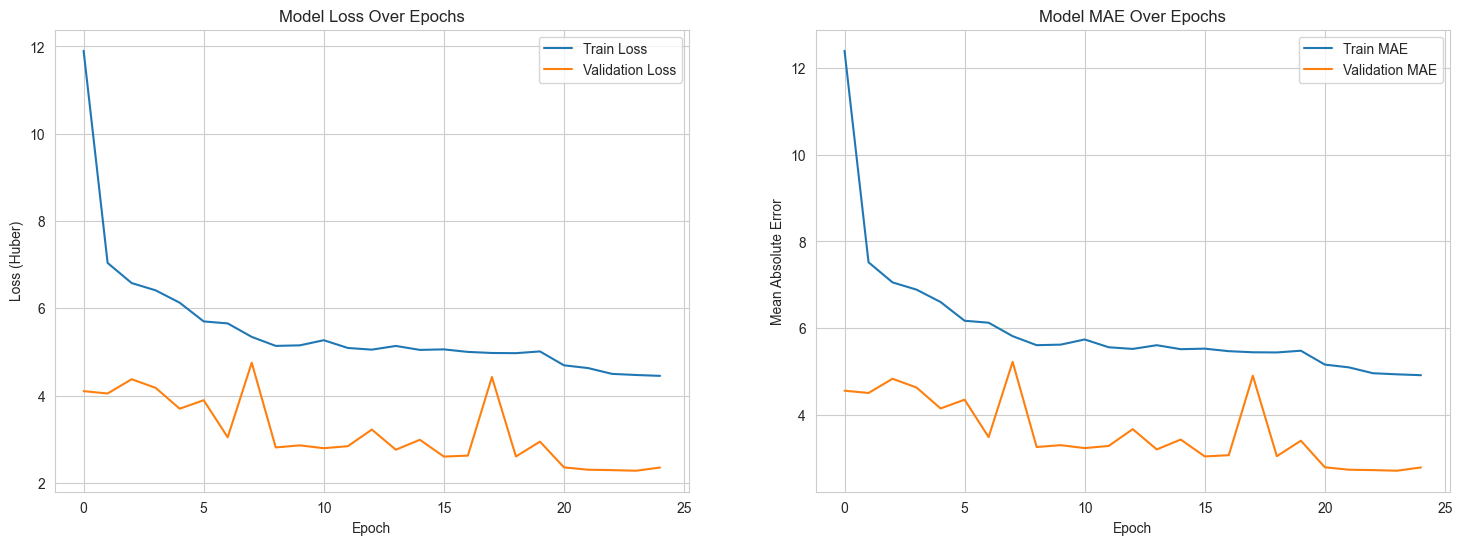


--- Model Evaluation on Random Validation Samples ---


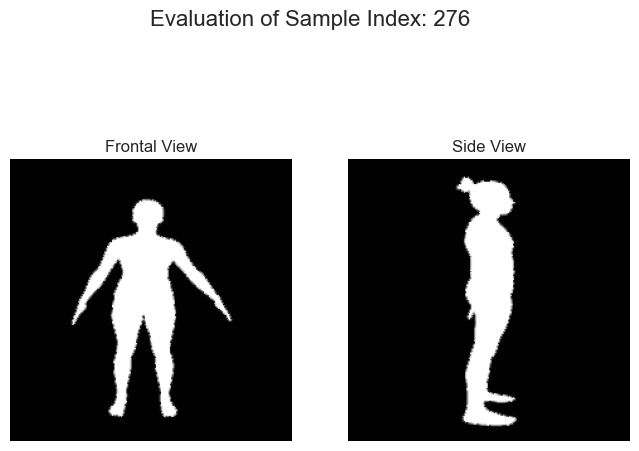

           Measurement   Predicted      Actual  Difference
0            height_cm  165.089996  160.000000        5.09
1            weight_kg   60.310001   57.000000        3.31
2                ankle   22.920000   22.270000        0.65
3           arm-length   47.790001   46.220001        1.57
4                bicep   26.540001   25.100000        1.44
5                 calf   34.410000   34.270000        0.14
6                chest   89.699997   89.510002        0.19
7              forearm   24.080000   23.719999        0.36
8                  hip   92.360001   96.190002       -3.83
9           leg-length   75.739998   74.250000        1.49
10    shoulder-breadth   33.560001   31.700001        1.86
11  shoulder-to-crotch   61.150002   57.340000        3.81
12               thigh   48.619999   48.480000        0.14
13               waist   76.440002   83.300003       -6.86
14               wrist   15.560000   14.210000        1.35
--------------------------------------------------


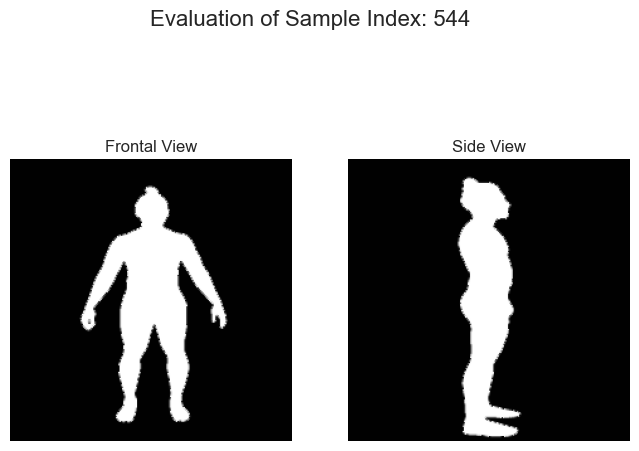

           Measurement   Predicted      Actual  Difference
0            height_cm  167.509995  165.250000        2.26
1            weight_kg   75.070000   73.099998        1.97
2                ankle   23.990000   24.049999       -0.06
3           arm-length   48.410000   48.799999       -0.39
4                bicep   29.940001   34.349998       -4.41
5                 calf   36.820000   36.939999       -0.12
6                chest  100.029999  101.160004       -1.13
7              forearm   26.250000   29.370001       -3.12
8                  hip  100.120003  102.699997       -2.58
9           leg-length   76.480003   75.330002        1.15
10    shoulder-breadth   35.450001   37.480000       -2.03
11  shoulder-to-crotch   63.759998   63.709999        0.05
12               thigh   52.889999   56.320000       -3.43
13               waist   88.570000   84.239998        4.33
14               wrist   16.600000   16.870001       -0.27
--------------------------------------------------


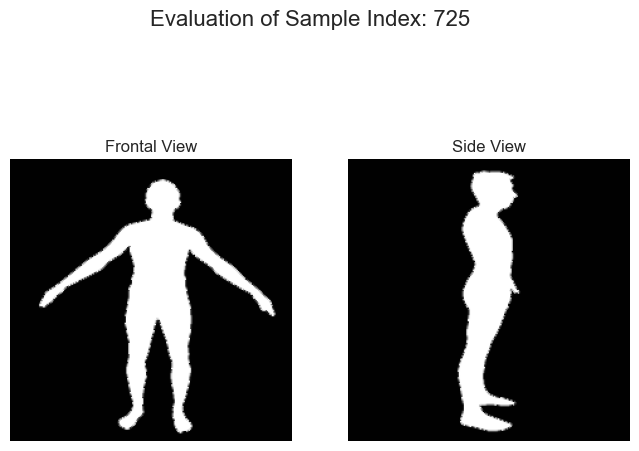

           Measurement   Predicted      Actual  Difference
0            height_cm  172.550003  180.199997       -7.65
1            weight_kg   67.099998   73.599998       -6.50
2                ankle   24.139999   24.830000       -0.69
3           arm-length   49.889999   53.419998       -3.53
4                bicep   28.629999   29.570000       -0.94
5                 calf   36.480000   37.020000       -0.54
6                chest   96.339996  102.720001       -6.38
7              forearm   25.700001   26.010000       -0.31
8                  hip   98.290001   98.970001       -0.68
9           leg-length   79.010002   83.800003       -4.79
10    shoulder-breadth   35.470001   37.200001       -1.73
11  shoulder-to-crotch   64.389999   66.430000       -2.04
12               thigh   51.799999   52.060001       -0.26
13               waist   83.040001   83.019997        0.02
14               wrist   16.480000   17.070000       -0.59
--------------------------------------------------


In [14]:
import torch
import matplotlib.pyplot as plt
import random
import pandas as pd

# --- 1. Load the Best Model ---
# First, ensure the model architecture is defined (run the cell from Step 2 again if needed)
model = BodyM_MetricEstimator(num_measurements=NUM_TARGETS)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the saved state dictionary from the best epoch
model.load_state_dict(torch.load(BEST_MODEL_PATH))
model.to(device)
model.eval() # Set the model to evaluation mode

print(f"✅ Best model '{BEST_MODEL_PATH}' loaded successfully.")

# --- 2. Plot Training & Validation History ---
# The 'history' dictionary should still be in memory from the training script
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot Loss
ax1.plot(history['train_loss'], label='Train Loss')
ax1.plot(history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss (Huber)')
ax1.legend()
ax1.grid(True)

# Plot Mean Absolute Error (MAE)
ax2.plot(history['train_mae'], label='Train MAE')
ax2.plot(history['val_mae'], label='Validation MAE')
ax2.set_title('Model MAE Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Mean Absolute Error')
ax2.legend()
ax2.grid(True)

plt.show()


# --- 3. Function to Predict and Display a Sample ---
def evaluate_sample(model, dataset, index):
    """Predicts on a single sample and displays images, predictions, and actuals."""
    
    # Get a single sample from the validation dataset
    frontal_img, side_img, targets = dataset[index]
    
    # Add a batch dimension (unsqueeze) and move to the device
    frontal_img_batch = frontal_img.unsqueeze(0).to(device)
    side_img_batch = side_img.unsqueeze(0).to(device)
    
    # Get model prediction
    with torch.no_grad():
        prediction = model(frontal_img_batch, side_img_batch)
    
    # Move prediction and targets back to CPU and convert to numpy for display
    prediction = prediction.squeeze(0).cpu().numpy()
    targets = targets.cpu().numpy()
    
    # --- Display the results ---
    # We need to reverse the normalization to show the images correctly
    unloader = transforms.ToPILImage()
    frontal_pil = unloader(frontal_img.cpu())
    side_pil = unloader(side_img.cpu())
    
    fig, axes = plt.subplots(1, 2, figsize=(8, 6))
    axes[0].imshow(frontal_pil)
    axes[0].set_title("Frontal View")
    axes[0].axis('off')
    axes[1].imshow(side_pil)
    axes[1].set_title("Side View")
    axes[1].axis('off')
    fig.suptitle(f"Evaluation of Sample Index: {index}", fontsize=16)
    plt.show()

    # Create a DataFrame for a clean side-by-side comparison
    results_df = pd.DataFrame({
        'Measurement': TARGET_COLUMNS,
        'Predicted': prediction.round(2),
        'Actual': targets.round(2)
    })
    results_df['Difference'] = (results_df['Predicted'] - results_df['Actual']).round(2)
    
    print(results_df.to_string())


# --- 4. Run Evaluation on a Few Random Samples ---
print("\n--- Model Evaluation on Random Validation Samples ---")
for _ in range(3): # Show 3 random examples
    random_idx = random.randint(0, len(val_dataset) - 1)
    evaluate_sample(model, val_dataset, random_idx)
    print("-" * 50)

 Final Evaluation with Accuracy Scores & Visual Examples

✅ Model 'best_bodym_model.pth' is loaded and in evaluation mode.

--- Preparing 'testA' ---
✅ Successfully prepared testA with 1684 samples.

--- Preparing 'testB' ---
✅ Successfully prepared testB with 1160 samples.

🚀 Starting final model evaluation on test sets...


Evaluating: 100%|██████████| 53/53 [05:51<00:00,  6.64s/it]


📊 ACCURACY RESULTS FOR: Test Set A
  -> Overall Mean Absolute Error (MAE): 2.8977
  -> Overall R-squared (R²) Score:      0.4739
--------------------------------------------------
  -> MAE for Each Measurement:
       Measurement    MAE
         height_cm 5.6019
         weight_kg 5.7970
             ankle 1.0526
        arm-length 1.9479
             bicep 1.8098
              calf 2.0643
             chest 4.3364
           forearm 1.2945
               hip 4.7403
        leg-length 3.3482
  shoulder-breadth 1.2916
shoulder-to-crotch 2.4028
             thigh 3.1809
             waist 3.8517
             wrist 0.7459

📸 Visual Examples from Test Set A:

--- Example 1 (Sample Index: 968) ---


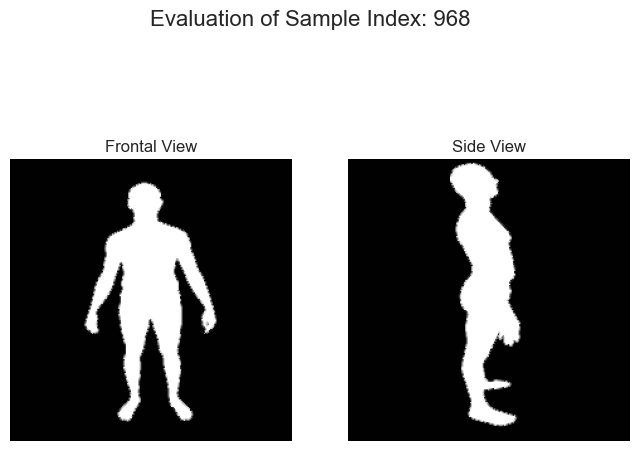

           Measurement   Predicted      Actual  Difference
0            height_cm  170.190002  186.500000  -16.309999
1            weight_kg   69.919998   82.199997  -12.280000
2                ankle   24.020000   23.680000    0.340000
3           arm-length   49.189999   54.930000   -5.740000
4                bicep   29.049999   31.670000   -2.620000
5                 calf   36.490002   35.169998    1.320000
6                chest   97.459999  101.040001   -3.580000
7              forearm   25.840000   27.430000   -1.590000
8                  hip   98.650002  104.750000   -6.100000
9           leg-length   77.830002   88.410004  -10.580000
10    shoulder-breadth   35.369999   36.660000   -1.290000
11  shoulder-to-crotch   63.990002   68.910004   -4.920000
12               thigh   52.049999   55.270000   -3.220000
13               waist   84.889999   90.959999   -6.070000
14               wrist   16.480000   16.610001   -0.130000
--------------------------------------------------

--- 

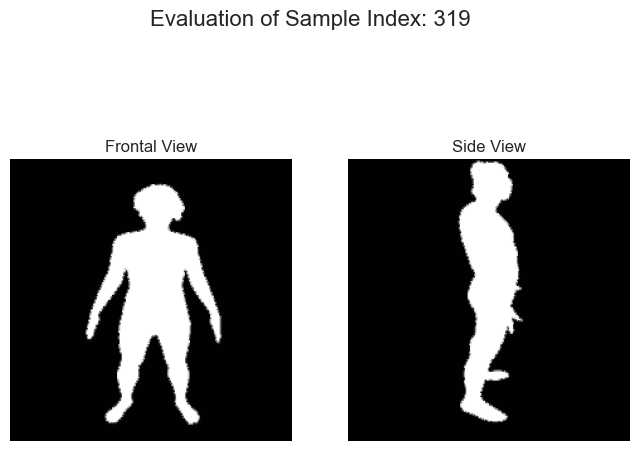

           Measurement   Predicted      Actual  Difference
0            height_cm  171.169998  179.100006       -7.93
1            weight_kg   67.930000   83.599998      -15.67
2                ankle   24.030001   27.450001       -3.42
3           arm-length   49.480000   52.580002       -3.10
4                bicep   28.709999   32.270000       -3.56
5                 calf   36.380001   41.700001       -5.32
6                chest   96.480003  103.349998       -6.87
7              forearm   25.670000   27.820000       -2.15
8                  hip   98.160004  105.370003       -7.21
9           leg-length   78.339996   78.160004        0.18
10    shoulder-breadth   35.320000   38.549999       -3.23
11  shoulder-to-crotch   64.050003   71.190002       -7.14
12               thigh   51.750000   55.549999       -3.80
13               waist   83.480003   91.639999       -8.16
14               wrist   16.430000   17.250000       -0.82
--------------------------------------------------

--- 

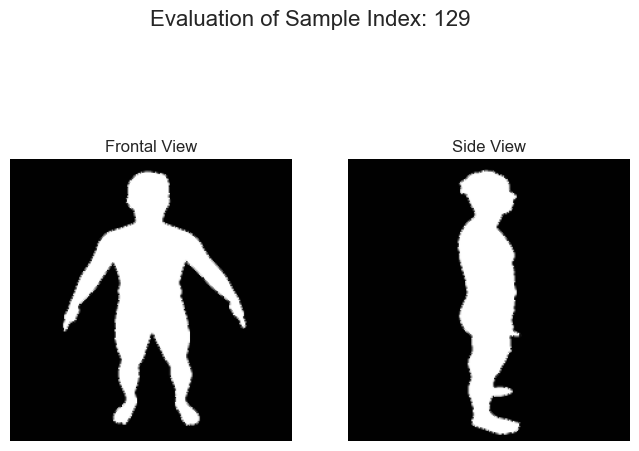

           Measurement   Predicted      Actual  Difference
0            height_cm  166.350006  173.000000       -6.65
1            weight_kg   78.480003   87.349998       -8.87
2                ankle   24.059999   25.549999       -1.49
3           arm-length   48.080002   48.090000       -0.01
4                bicep   30.590000   35.060001       -4.47
5                 calf   37.150002   40.150002       -3.00
6                chest  101.970001  108.410004       -6.44
7              forearm   26.570000   29.309999       -2.74
8                  hip  101.459999  106.989998       -5.53
9           leg-length   75.870003   75.309998        0.56
10    shoulder-breadth   35.599998   38.720001       -3.12
11  shoulder-to-crotch   63.779999   68.339996       -4.56
12               thigh   53.630001   58.669998       -5.04
13               waist   91.169998   95.040001       -3.87
14               wrist   16.730000   18.400000       -1.67
--------------------------------------------------


Evaluating: 100%|██████████| 37/37 [04:06<00:00,  6.68s/it]



📊 ACCURACY RESULTS FOR: Test Set B
  -> Overall Mean Absolute Error (MAE): 3.3188
  -> Overall R-squared (R²) Score:      0.5140
--------------------------------------------------
  -> MAE for Each Measurement:
       Measurement    MAE
         height_cm 5.9595
         weight_kg 8.1108
             ankle 1.2124
        arm-length 1.9928
             bicep 1.8085
              calf 2.2488
             chest 4.8602
           forearm 1.4472
               hip 5.1226
        leg-length 3.1794
  shoulder-breadth 1.6691
shoulder-to-crotch 2.7860
             thigh 3.3070
             waist 5.1914
             wrist 0.8861

📸 Visual Examples from Test Set B:

--- Example 1 (Sample Index: 275) ---


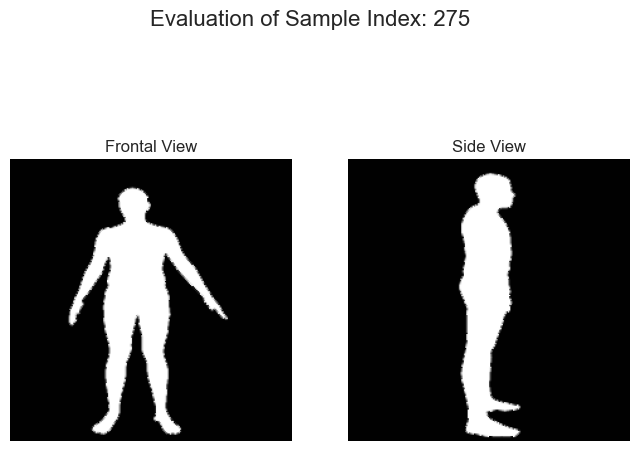

           Measurement   Predicted      Actual  Difference
0            height_cm  181.259995  171.500000        9.76
1            weight_kg   76.919998   70.500000        6.42
2                ankle   25.680000   22.920000        2.76
3           arm-length   52.360001   50.150002        2.21
4                bicep   31.450001   28.600000        2.85
5                 calf   39.180000   36.619999        2.56
6                chest  105.389999  100.389999        5.00
7              forearm   27.820000   25.059999        2.76
8                  hip  106.190002  101.279999        4.91
9           leg-length   82.809998   77.410004        5.40
10    shoulder-breadth   37.889999   36.240002        1.65
11  shoulder-to-crotch   68.449997   66.610001        1.84
12               thigh   56.040001   52.000000        4.04
13               waist   92.360001   89.059998        3.30
14               wrist   17.670000   16.030001        1.64
--------------------------------------------------

--- 

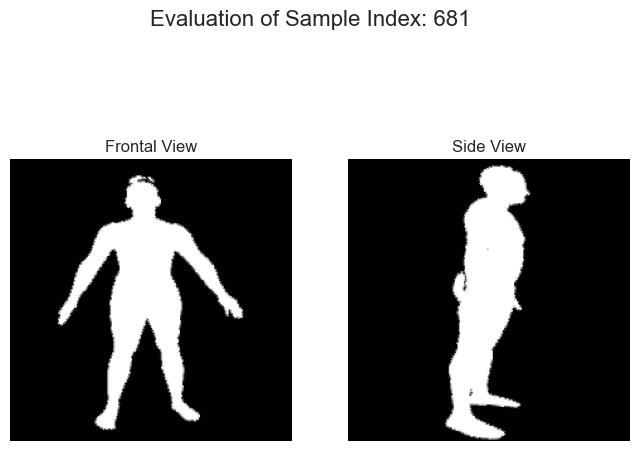

           Measurement   Predicted      Actual  Difference
0            height_cm  170.130005  162.000000        8.13
1            weight_kg   75.320000   80.000000       -4.68
2                ankle   24.309999   24.059999        0.25
3           arm-length   49.160000   48.049999        1.11
4                bicep   30.209999   32.980000       -2.77
5                 calf   37.259998   37.349998       -0.09
6                chest  101.010002  105.790001       -4.78
7              forearm   26.530001   27.860001       -1.33
8                  hip  101.260002  108.379997       -7.12
9           leg-length   77.690002   76.519997        1.17
10    shoulder-breadth   35.910000   37.900002       -1.99
11  shoulder-to-crotch   64.629997   64.620003        0.01
12               thigh   53.480000   57.810001       -4.33
13               waist   89.230003   96.660004       -7.43
14               wrist   16.799999   16.700001        0.10
--------------------------------------------------

--- 

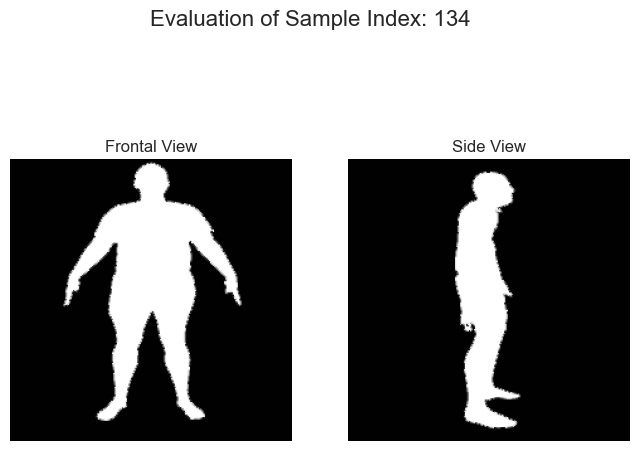

           Measurement   Predicted      Actual  Difference
0            height_cm  182.970001  179.500000        3.47
1            weight_kg   94.379997  106.599998      -12.22
2                ankle   26.879999   26.180000        0.70
3           arm-length   52.790001   52.270000        0.52
4                bicep   35.439999   37.009998       -1.57
5                 calf   42.049999   43.759998       -1.71
6                chest  117.519997  118.790001       -1.27
7              forearm   30.129999   30.530001       -0.40
8                  hip  116.500000  119.010002       -2.51
9           leg-length   83.209999   84.150002       -0.94
10    shoulder-breadth   39.730000   39.400002        0.33
11  shoulder-to-crotch   70.870003   71.000000       -0.13
12               thigh   61.480000   62.720001       -1.24
13               waist  106.820000  114.639999       -7.82
14               wrist   18.830000   19.290001       -0.46
--------------------------------------------------


In [15]:
import torch
import pandas as pd
from torch.utils.data import DataLoader
from sklearn.metrics import mean_absolute_error, r2_score
from tqdm import tqdm
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from torchvision import transforms

# --- Ensure Model is Loaded and in Eval Mode ---
# If you are in a new session, you must first define the model architecture
# and then load the weights as we did in the previous step.
# model = BodyM_MetricEstimator(num_measurements=NUM_TARGETS)
# model.load_state_dict(torch.load(BEST_MODEL_PATH))
# model.to(device)
model.eval()
print(f"✅ Model '{BEST_MODEL_PATH}' is loaded and in evaluation mode.")

# --- Re-define TARGET_COLUMNS and image_transforms if not in memory ---
TARGET_COLUMNS = [
    'height_cm', 'weight_kg', 'ankle', 'arm-length', 'bicep', 'calf', 'chest',
    'forearm', 'hip', 'leg-length', 'shoulder-breadth', 'shoulder-to-crotch',
    'thigh', 'waist', 'wrist'
]
image_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# --- Function to Prepare a Test Set ---
def prepare_test_set(test_set_name):
    print(f"\n--- Preparing '{test_set_name}' ---")
    base_path = f"C:\\Users\\bened\\Documents\\Alyster Coding\\PROJECTS\\AI_GYM\\bodym_data\\{test_set_name}"
    try:
        df_hwg = pd.read_csv(os.path.join(base_path, "hwg_metadata.csv"))
        df_measurements = pd.read_csv(os.path.join(base_path, "measurements.csv"))
        df_map = pd.read_csv(os.path.join(base_path, "subject_to_photo_map.csv"))
    except FileNotFoundError as e:
        print(f"❌ Error loading files for {test_set_name}: {e}")
        return None, None
    df_merged = pd.merge(df_hwg, df_measurements, on="subject_id")
    df_test = pd.merge(df_merged, df_map, on="subject_id")
    df_test['frontal_img_path'] = df_test['photo_id'].apply(lambda id: os.path.join(base_path, 'mask', id + '.png'))
    df_test['side_img_path'] = df_test['photo_id'].apply(lambda id: os.path.join(base_path, 'mask_left', id + '.png'))
    test_dataset = BodyMDataset(df=df_test, target_columns=TARGET_COLUMNS, transform=image_transforms)
    test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    print(f"✅ Successfully prepared {test_set_name} with {len(df_test)} samples.")
    return test_dataloader, test_dataset

# --- Function to Get Accuracy Scores ---
def get_accuracy_scores(model, dataloader):
    all_predictions, all_targets = [], []
    with torch.no_grad():
        for frontal_imgs, side_imgs, targets in tqdm(dataloader, desc="Evaluating"):
            predictions = model(frontal_imgs.to(device), side_imgs.to(device))
            all_predictions.append(predictions.cpu().numpy())
            all_targets.append(targets.cpu().numpy())
    all_predictions = np.concatenate(all_predictions, axis=0)
    all_targets = np.concatenate(all_targets, axis=0)
    mae = mean_absolute_error(all_targets, all_predictions)
    r2 = r2_score(all_targets, all_predictions)
    per_measurement_mae = np.mean(np.abs(all_predictions - all_targets), axis=0)
    return mae, r2, per_measurement_mae

# --- Function to Display a Single Sample ---
def evaluate_sample(model, dataset, index):
    frontal_img, side_img, targets = dataset[index]
    frontal_img_batch = frontal_img.unsqueeze(0).to(device)
    side_img_batch = side_img.unsqueeze(0).to(device)
    with torch.no_grad():
        prediction = model(frontal_img_batch, side_img_batch)
    prediction = prediction.squeeze(0).cpu().numpy()
    targets = targets.cpu().numpy()
    unloader = transforms.ToPILImage()
    frontal_pil = unloader(frontal_img.cpu())
    side_pil = unloader(side_img.cpu())
    fig, axes = plt.subplots(1, 2, figsize=(8, 6))
    axes[0].imshow(frontal_pil); axes[0].set_title("Frontal View"); axes[0].axis('off')
    axes[1].imshow(side_pil); axes[1].set_title("Side View"); axes[1].axis('off')
    fig.suptitle(f"Evaluation of Sample Index: {index}", fontsize=16)
    plt.show()
    results_df = pd.DataFrame({
        'Measurement': TARGET_COLUMNS,
        'Predicted': prediction.round(2),
        'Actual': targets.round(2)
    })
    results_df['Difference'] = (results_df['Predicted'] - results_df['Actual']).round(2)
    print(results_df.to_string())

# --- Main Evaluation Execution ---
test_sets = {}
test_sets['Test Set A'] = prepare_test_set('testA')
test_sets['Test Set B'] = prepare_test_set('testB')

print("\n🚀 Starting final model evaluation on test sets...")

for name, (loader, dataset) in test_sets.items():
    if loader is None:
        continue
    
    overall_mae, overall_r2, per_measurement_mae = get_accuracy_scores(model, loader)
    
    print("\n" + "="*50)
    print(f"📊 ACCURACY RESULTS FOR: {name}")
    print("="*50)
    print(f"  -> Overall Mean Absolute Error (MAE): {overall_mae:.4f}")
    print(f"  -> Overall R-squared (R²) Score:      {overall_r2:.4f}")
    print("-"*50)
    print("  -> MAE for Each Measurement:")
    results_df = pd.DataFrame({'Measurement': TARGET_COLUMNS, 'MAE': per_measurement_mae.round(4)})
    print(results_df.to_string(index=False))
    print("="*50)
    
    # --- ADDED: Qualitative Evaluation ---
    print(f"\n📸 Visual Examples from {name}:")
    for i in range(3):
        random_idx = random.randint(0, len(dataset) - 1)
        print(f"\n--- Example {i+1} (Sample Index: {random_idx}) ---")
        evaluate_sample(model, dataset, random_idx)
        print("-" * 50)